In [1]:
# script for kotte model identifiability without noise in input experimental data
import numpy as np
from generate_expdata import generate_expdata
from simulate_data import arrange_experimental_data
from kotte_model import establish_kotte_flux_identifiability
from kotte_model import flux_ident_2_data_combination
from kotte_model import flux_ident_3_data_combination
from process_ident_data import process_info_sample
from process_ident_data import parameter_plot_data_per_sample
from process_ident_data import experiments_per_sample_for_ident
from process_ident_data import experiment_position_based_info_per_sample
from plot_ident_results import flux_parameter_plot
from plot_ident_results import parameter_experiment_type_plot
from plot_ident_results import data_utility_plot
from plot_ident_results import parameter_identifibaility_plot

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=0)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])

Final Run Statistics: --- 

 Number of steps                                 : 458
 Number of function evaluations                  : 565
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 20
 Number of nonlinear iterations                  : 561
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0527790024685 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 11
 Number of function evaluations                  : 17
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jaco

Final Run Statistics: --- 

 Number of steps                                 : 267
 Number of function evaluations                  : 343
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Jacobian eval.  : 15
 Number of error test failures                   : 14
 Number of nonlinear iterations                  : 339
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.039166155214 seconds.
Perturbation 15

Final Run Statistics: --- 

 Number of steps                                 : 338
 Number of function evaluations                  : 433
 Number of Jacobian evaluations                  : 7
 Number of function eval. due to Ja

In [2]:
# get combination of 2 experiments and perform identifiability on all fluxes that require 2 data sets
print('Practical Identifiability Analysis of fluxes with 2 parameters \n')
choose_2 = range(0, 306) # choose numbr of experimental datasets to use of analysis
# get combinations of experimental datasets
experimental_datasets_2_expts = \
    arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 2, exp_flux_index, choose_2)
ident_details_2 = flux_ident_2_data_combination(experimental_datasets_2_expts, choose=choose_2)
print('Identifiability analysis for fluxes with 2 parameters complete.\n')
# data processing
data_list_2, max_parameter_2, \
combined_data_list_2, combined_max_parameter_2 = process_info_sample(ident_details_2,
                                                                     experimental_datasets_2_expts,
                                                                     perturbation_details, combine_fluxes=1)

Practical Identifiability Analysis of fluxes with 2 parameters 

Identifiability for Dataset 1 of 306: Original ID: 0

Identifiability for Dataset 2 of 306: Original ID: 1

Identifiability for Dataset 3 of 306: Original ID: 2

Identifiability for Dataset 4 of 306: Original ID: 3

Identifiability for Dataset 5 of 306: Original ID: 4

Identifiability for Dataset 6 of 306: Original ID: 5

Identifiability for Dataset 7 of 306: Original ID: 6

Identifiability for Dataset 8 of 306: Original ID: 7

Identifiability for Dataset 9 of 306: Original ID: 8

Identifiability for Dataset 10 of 306: Original ID: 9

Identifiability for Dataset 11 of 306: Original ID: 10

Identifiability for Dataset 12 of 306: Original ID: 11

Identifiability for Dataset 13 of 306: Original ID: 12

Identifiability for Dataset 14 of 306: Original ID: 13

Identifiability for Dataset 15 of 306: Original ID: 14

Identifiability for Dataset 16 of 306: Original ID: 15

Identifiability for Dataset 17 of 306: Original ID: 16

Id

kotte_model.py:107: RuntimeWarning: invalid value encountered in double_scalars
  k1cat_enzyme_value = k1cat_enzyme_numerator_value/k1cat_enzyme_denominator_value
kotte_model.py:110: RuntimeWarning: invalid value encountered in double_scalars
  k1ac_enzyme_value = k1ac_enzyme_numerator_value/k1ac_enzyme_denominator_value
kotte_model.py:686: RuntimeWarning: invalid value encountered in sign
  signed_ident_values = np.sign(ident_values)


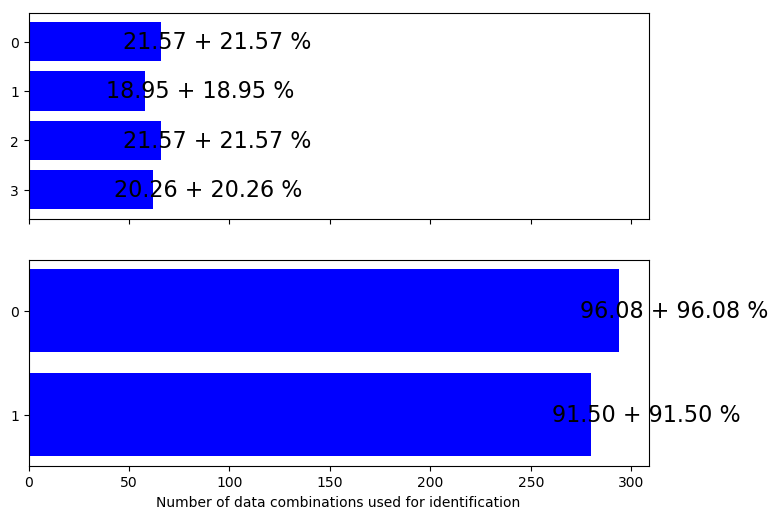

In [3]:
# plot parameter identifibaility for all fluxes using 2 data combinations
parameter_identifibaility_plot(max_parameter_2)

In [4]:
# get combination of 3 experiments and perform identifiability on all fluxes that require 3 data sets
print('Practical Identifiability Analysis of fluxes with 3 parameters \n')
choose_3 = range(0, 4896) # choose numbr of experimental datasets to use of analysis
# get combinations of experimental datasets
experimental_datasets_3_expts = \
    arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 3, exp_flux_index, choose=choose_3)
ident_details_3 = flux_ident_3_data_combination(experimental_datasets_3_expts, choose=choose_3)
print('Identifiability analysis for fluxes with 3 parameters complete.\n')
# data processing
data_list_3, max_parameter_3 = process_info_sample(ident_details_3,
                                                   experimental_datasets_3_expts,
                                                   perturbation_details)

Practical Identifiability Analysis of fluxes with 3 parameters 

Identifiability for Dataset 1 of 4896: Original ID: 0

Identifiability for Dataset 2 of 4896: Original ID: 1

Identifiability for Dataset 3 of 4896: Original ID: 2

Identifiability for Dataset 4 of 4896: Original ID: 3

Identifiability for Dataset 5 of 4896: Original ID: 4

Identifiability for Dataset 6 of 4896: Original ID: 5

Identifiability for Dataset 7 of 4896: Original ID: 6

Identifiability for Dataset 8 of 4896: Original ID: 7

Identifiability for Dataset 9 of 4896: Original ID: 8

Identifiability for Dataset 10 of 4896: Original ID: 9

Identifiability for Dataset 11 of 4896: Original ID: 10

Identifiability for Dataset 12 of 4896: Original ID: 11

Identifiability for Dataset 13 of 4896: Original ID: 12

Identifiability for Dataset 14 of 4896: Original ID: 13

Identifiability for Dataset 15 of 4896: Original ID: 14

Identifiability for Dataset 16 of 4896: Original ID: 15

Identifiability for Dataset 17 of 4896: Or

kotte_model.py:213: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:220: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sqrt_v3max_nr_1)))/\
kotte_model.py:283: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:290: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sqrt_v3max_nr_2)))/\
kotte_model.py:353: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x13*x21*x23 - v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:360: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_nr_1_k3fdp)))/ \
kotte_model.py:423: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:430: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_k3fdp_nr_2)))/\
kotte_model.py:451: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_k3pep_nr_1)
ko

Identifiability for Dataset 384 of 4896: Original ID: 383

Identifiability for Dataset 385 of 4896: Original ID: 384

Identifiability for Dataset 386 of 4896: Original ID: 385

Identifiability for Dataset 387 of 4896: Original ID: 386

Identifiability for Dataset 388 of 4896: Original ID: 387

Identifiability for Dataset 389 of 4896: Original ID: 388

Identifiability for Dataset 390 of 4896: Original ID: 389

Identifiability for Dataset 391 of 4896: Original ID: 390

Identifiability for Dataset 392 of 4896: Original ID: 391

Identifiability for Dataset 393 of 4896: Original ID: 392

Identifiability for Dataset 394 of 4896: Original ID: 393

Identifiability for Dataset 395 of 4896: Original ID: 394

Identifiability for Dataset 396 of 4896: Original ID: 395

Identifiability for Dataset 397 of 4896: Original ID: 396

Identifiability for Dataset 398 of 4896: Original ID: 397

Identifiability for Dataset 399 of 4896: Original ID: 398

Identifiability for Dataset 400 of 4896: Original ID: 39

Identifiability for Dataset 714 of 4896: Original ID: 713

Identifiability for Dataset 715 of 4896: Original ID: 714

Identifiability for Dataset 716 of 4896: Original ID: 715

Identifiability for Dataset 717 of 4896: Original ID: 716

Identifiability for Dataset 718 of 4896: Original ID: 717

Identifiability for Dataset 719 of 4896: Original ID: 718

Identifiability for Dataset 720 of 4896: Original ID: 719

Identifiability for Dataset 721 of 4896: Original ID: 720

Identifiability for Dataset 722 of 4896: Original ID: 721

Identifiability for Dataset 723 of 4896: Original ID: 722

Identifiability for Dataset 724 of 4896: Original ID: 723

Identifiability for Dataset 725 of 4896: Original ID: 724

Identifiability for Dataset 726 of 4896: Original ID: 725

Identifiability for Dataset 727 of 4896: Original ID: 726

Identifiability for Dataset 728 of 4896: Original ID: 727

Identifiability for Dataset 729 of 4896: Original ID: 728

Identifiability for Dataset 730 of 4896: Original ID: 72

Identifiability for Dataset 1024 of 4896: Original ID: 1023

Identifiability for Dataset 1025 of 4896: Original ID: 1024

Identifiability for Dataset 1026 of 4896: Original ID: 1025

Identifiability for Dataset 1027 of 4896: Original ID: 1026

Identifiability for Dataset 1028 of 4896: Original ID: 1027

Identifiability for Dataset 1029 of 4896: Original ID: 1028

Identifiability for Dataset 1030 of 4896: Original ID: 1029

Identifiability for Dataset 1031 of 4896: Original ID: 1030

Identifiability for Dataset 1032 of 4896: Original ID: 1031

Identifiability for Dataset 1033 of 4896: Original ID: 1032

Identifiability for Dataset 1034 of 4896: Original ID: 1033

Identifiability for Dataset 1035 of 4896: Original ID: 1034

Identifiability for Dataset 1036 of 4896: Original ID: 1035

Identifiability for Dataset 1037 of 4896: Original ID: 1036

Identifiability for Dataset 1038 of 4896: Original ID: 1037

Identifiability for Dataset 1039 of 4896: Original ID: 1038

Identifiability for Data

Identifiability for Dataset 1335 of 4896: Original ID: 1334

Identifiability for Dataset 1336 of 4896: Original ID: 1335

Identifiability for Dataset 1337 of 4896: Original ID: 1336

Identifiability for Dataset 1338 of 4896: Original ID: 1337

Identifiability for Dataset 1339 of 4896: Original ID: 1338

Identifiability for Dataset 1340 of 4896: Original ID: 1339

Identifiability for Dataset 1341 of 4896: Original ID: 1340

Identifiability for Dataset 1342 of 4896: Original ID: 1341

Identifiability for Dataset 1343 of 4896: Original ID: 1342

Identifiability for Dataset 1344 of 4896: Original ID: 1343

Identifiability for Dataset 1345 of 4896: Original ID: 1344

Identifiability for Dataset 1346 of 4896: Original ID: 1345

Identifiability for Dataset 1347 of 4896: Original ID: 1346

Identifiability for Dataset 1348 of 4896: Original ID: 1347

Identifiability for Dataset 1349 of 4896: Original ID: 1348

Identifiability for Dataset 1350 of 4896: Original ID: 1349

Identifiability for Data

Identifiability for Dataset 1618 of 4896: Original ID: 1617

Identifiability for Dataset 1619 of 4896: Original ID: 1618

Identifiability for Dataset 1620 of 4896: Original ID: 1619

Identifiability for Dataset 1621 of 4896: Original ID: 1620

Identifiability for Dataset 1622 of 4896: Original ID: 1621

Identifiability for Dataset 1623 of 4896: Original ID: 1622

Identifiability for Dataset 1624 of 4896: Original ID: 1623

Identifiability for Dataset 1625 of 4896: Original ID: 1624

Identifiability for Dataset 1626 of 4896: Original ID: 1625

Identifiability for Dataset 1627 of 4896: Original ID: 1626

Identifiability for Dataset 1628 of 4896: Original ID: 1627

Identifiability for Dataset 1629 of 4896: Original ID: 1628

Identifiability for Dataset 1630 of 4896: Original ID: 1629

Identifiability for Dataset 1631 of 4896: Original ID: 1630

Identifiability for Dataset 1632 of 4896: Original ID: 1631

Identifiability for Dataset 1633 of 4896: Original ID: 1632

Identifiability for Data

Identifiability for Dataset 1904 of 4896: Original ID: 1903

Identifiability for Dataset 1905 of 4896: Original ID: 1904

Identifiability for Dataset 1906 of 4896: Original ID: 1905

Identifiability for Dataset 1907 of 4896: Original ID: 1906

Identifiability for Dataset 1908 of 4896: Original ID: 1907

Identifiability for Dataset 1909 of 4896: Original ID: 1908

Identifiability for Dataset 1910 of 4896: Original ID: 1909

Identifiability for Dataset 1911 of 4896: Original ID: 1910

Identifiability for Dataset 1912 of 4896: Original ID: 1911

Identifiability for Dataset 1913 of 4896: Original ID: 1912

Identifiability for Dataset 1914 of 4896: Original ID: 1913

Identifiability for Dataset 1915 of 4896: Original ID: 1914

Identifiability for Dataset 1916 of 4896: Original ID: 1915

Identifiability for Dataset 1917 of 4896: Original ID: 1916

Identifiability for Dataset 1918 of 4896: Original ID: 1917

Identifiability for Dataset 1919 of 4896: Original ID: 1918

Identifiability for Data

Identifiability for Dataset 2229 of 4896: Original ID: 2228

Identifiability for Dataset 2230 of 4896: Original ID: 2229

Identifiability for Dataset 2231 of 4896: Original ID: 2230

Identifiability for Dataset 2232 of 4896: Original ID: 2231

Identifiability for Dataset 2233 of 4896: Original ID: 2232

Identifiability for Dataset 2234 of 4896: Original ID: 2233

Identifiability for Dataset 2235 of 4896: Original ID: 2234

Identifiability for Dataset 2236 of 4896: Original ID: 2235

Identifiability for Dataset 2237 of 4896: Original ID: 2236

Identifiability for Dataset 2238 of 4896: Original ID: 2237

Identifiability for Dataset 2239 of 4896: Original ID: 2238

Identifiability for Dataset 2240 of 4896: Original ID: 2239

Identifiability for Dataset 2241 of 4896: Original ID: 2240

Identifiability for Dataset 2242 of 4896: Original ID: 2241

Identifiability for Dataset 2243 of 4896: Original ID: 2242

Identifiability for Dataset 2244 of 4896: Original ID: 2243

Identifiability for Data

Identifiability for Dataset 2517 of 4896: Original ID: 2516

Identifiability for Dataset 2518 of 4896: Original ID: 2517

Identifiability for Dataset 2519 of 4896: Original ID: 2518

Identifiability for Dataset 2520 of 4896: Original ID: 2519

Identifiability for Dataset 2521 of 4896: Original ID: 2520

Identifiability for Dataset 2522 of 4896: Original ID: 2521

Identifiability for Dataset 2523 of 4896: Original ID: 2522

Identifiability for Dataset 2524 of 4896: Original ID: 2523

Identifiability for Dataset 2525 of 4896: Original ID: 2524

Identifiability for Dataset 2526 of 4896: Original ID: 2525

Identifiability for Dataset 2527 of 4896: Original ID: 2526

Identifiability for Dataset 2528 of 4896: Original ID: 2527

Identifiability for Dataset 2529 of 4896: Original ID: 2528

Identifiability for Dataset 2530 of 4896: Original ID: 2529

Identifiability for Dataset 2531 of 4896: Original ID: 2530

Identifiability for Dataset 2532 of 4896: Original ID: 2531

Identifiability for Data

Identifiability for Dataset 2777 of 4896: Original ID: 2776

Identifiability for Dataset 2778 of 4896: Original ID: 2777

Identifiability for Dataset 2779 of 4896: Original ID: 2778

Identifiability for Dataset 2780 of 4896: Original ID: 2779

Identifiability for Dataset 2781 of 4896: Original ID: 2780

Identifiability for Dataset 2782 of 4896: Original ID: 2781

Identifiability for Dataset 2783 of 4896: Original ID: 2782

Identifiability for Dataset 2784 of 4896: Original ID: 2783

Identifiability for Dataset 2785 of 4896: Original ID: 2784

Identifiability for Dataset 2786 of 4896: Original ID: 2785

Identifiability for Dataset 2787 of 4896: Original ID: 2786

Identifiability for Dataset 2788 of 4896: Original ID: 2787

Identifiability for Dataset 2789 of 4896: Original ID: 2788

Identifiability for Dataset 2790 of 4896: Original ID: 2789

Identifiability for Dataset 2791 of 4896: Original ID: 2790

Identifiability for Dataset 2792 of 4896: Original ID: 2791

Identifiability for Data

Identifiability for Dataset 3073 of 4896: Original ID: 3072

Identifiability for Dataset 3074 of 4896: Original ID: 3073

Identifiability for Dataset 3075 of 4896: Original ID: 3074

Identifiability for Dataset 3076 of 4896: Original ID: 3075

Identifiability for Dataset 3077 of 4896: Original ID: 3076

Identifiability for Dataset 3078 of 4896: Original ID: 3077

Identifiability for Dataset 3079 of 4896: Original ID: 3078

Identifiability for Dataset 3080 of 4896: Original ID: 3079

Identifiability for Dataset 3081 of 4896: Original ID: 3080

Identifiability for Dataset 3082 of 4896: Original ID: 3081

Identifiability for Dataset 3083 of 4896: Original ID: 3082

Identifiability for Dataset 3084 of 4896: Original ID: 3083

Identifiability for Dataset 3085 of 4896: Original ID: 3084

Identifiability for Dataset 3086 of 4896: Original ID: 3085

Identifiability for Dataset 3087 of 4896: Original ID: 3086

Identifiability for Dataset 3088 of 4896: Original ID: 3087

Identifiability for Data

Identifiability for Dataset 3347 of 4896: Original ID: 3346

Identifiability for Dataset 3348 of 4896: Original ID: 3347

Identifiability for Dataset 3349 of 4896: Original ID: 3348

Identifiability for Dataset 3350 of 4896: Original ID: 3349

Identifiability for Dataset 3351 of 4896: Original ID: 3350

Identifiability for Dataset 3352 of 4896: Original ID: 3351

Identifiability for Dataset 3353 of 4896: Original ID: 3352

Identifiability for Dataset 3354 of 4896: Original ID: 3353

Identifiability for Dataset 3355 of 4896: Original ID: 3354

Identifiability for Dataset 3356 of 4896: Original ID: 3355

Identifiability for Dataset 3357 of 4896: Original ID: 3356

Identifiability for Dataset 3358 of 4896: Original ID: 3357

Identifiability for Dataset 3359 of 4896: Original ID: 3358

Identifiability for Dataset 3360 of 4896: Original ID: 3359

Identifiability for Dataset 3361 of 4896: Original ID: 3360

Identifiability for Dataset 3362 of 4896: Original ID: 3361

Identifiability for Data

Identifiability for Dataset 3531 of 4896: Original ID: 3530

Identifiability for Dataset 3532 of 4896: Original ID: 3531

Identifiability for Dataset 3533 of 4896: Original ID: 3532

Identifiability for Dataset 3534 of 4896: Original ID: 3533

Identifiability for Dataset 3535 of 4896: Original ID: 3534

Identifiability for Dataset 3536 of 4896: Original ID: 3535

Identifiability for Dataset 3537 of 4896: Original ID: 3536

Identifiability for Dataset 3538 of 4896: Original ID: 3537

Identifiability for Dataset 3539 of 4896: Original ID: 3538

Identifiability for Dataset 3540 of 4896: Original ID: 3539

Identifiability for Dataset 3541 of 4896: Original ID: 3540

Identifiability for Dataset 3542 of 4896: Original ID: 3541

Identifiability for Dataset 3543 of 4896: Original ID: 3542

Identifiability for Dataset 3544 of 4896: Original ID: 3543

Identifiability for Dataset 3545 of 4896: Original ID: 3544

Identifiability for Dataset 3546 of 4896: Original ID: 3545

Identifiability for Data

Identifiability for Dataset 3864 of 4896: Original ID: 3863

Identifiability for Dataset 3865 of 4896: Original ID: 3864

Identifiability for Dataset 3866 of 4896: Original ID: 3865

Identifiability for Dataset 3867 of 4896: Original ID: 3866

Identifiability for Dataset 3868 of 4896: Original ID: 3867

Identifiability for Dataset 3869 of 4896: Original ID: 3868

Identifiability for Dataset 3870 of 4896: Original ID: 3869

Identifiability for Dataset 3871 of 4896: Original ID: 3870

Identifiability for Dataset 3872 of 4896: Original ID: 3871

Identifiability for Dataset 3873 of 4896: Original ID: 3872

Identifiability for Dataset 3874 of 4896: Original ID: 3873

Identifiability for Dataset 3875 of 4896: Original ID: 3874

Identifiability for Dataset 3876 of 4896: Original ID: 3875

Identifiability for Dataset 3877 of 4896: Original ID: 3876

Identifiability for Dataset 3878 of 4896: Original ID: 3877

Identifiability for Dataset 3879 of 4896: Original ID: 3878

Identifiability for Data

Identifiability for Dataset 4109 of 4896: Original ID: 4108

Identifiability for Dataset 4110 of 4896: Original ID: 4109

Identifiability for Dataset 4111 of 4896: Original ID: 4110

Identifiability for Dataset 4112 of 4896: Original ID: 4111

Identifiability for Dataset 4113 of 4896: Original ID: 4112

Identifiability for Dataset 4114 of 4896: Original ID: 4113

Identifiability for Dataset 4115 of 4896: Original ID: 4114

Identifiability for Dataset 4116 of 4896: Original ID: 4115

Identifiability for Dataset 4117 of 4896: Original ID: 4116

Identifiability for Dataset 4118 of 4896: Original ID: 4117

Identifiability for Dataset 4119 of 4896: Original ID: 4118

Identifiability for Dataset 4120 of 4896: Original ID: 4119

Identifiability for Dataset 4121 of 4896: Original ID: 4120

Identifiability for Dataset 4122 of 4896: Original ID: 4121

Identifiability for Dataset 4123 of 4896: Original ID: 4122

Identifiability for Dataset 4124 of 4896: Original ID: 4123

Identifiability for Data

Identifiability for Dataset 4376 of 4896: Original ID: 4375

Identifiability for Dataset 4377 of 4896: Original ID: 4376

Identifiability for Dataset 4378 of 4896: Original ID: 4377

Identifiability for Dataset 4379 of 4896: Original ID: 4378

Identifiability for Dataset 4380 of 4896: Original ID: 4379

Identifiability for Dataset 4381 of 4896: Original ID: 4380

Identifiability for Dataset 4382 of 4896: Original ID: 4381

Identifiability for Dataset 4383 of 4896: Original ID: 4382

Identifiability for Dataset 4384 of 4896: Original ID: 4383

Identifiability for Dataset 4385 of 4896: Original ID: 4384

Identifiability for Dataset 4386 of 4896: Original ID: 4385

Identifiability for Dataset 4387 of 4896: Original ID: 4386

Identifiability for Dataset 4388 of 4896: Original ID: 4387

Identifiability for Dataset 4389 of 4896: Original ID: 4388

Identifiability for Dataset 4390 of 4896: Original ID: 4389

Identifiability for Dataset 4391 of 4896: Original ID: 4390

Identifiability for Data

Identifiability for Dataset 4546 of 4896: Original ID: 4545

Identifiability for Dataset 4547 of 4896: Original ID: 4546

Identifiability for Dataset 4548 of 4896: Original ID: 4547

Identifiability for Dataset 4549 of 4896: Original ID: 4548

Identifiability for Dataset 4550 of 4896: Original ID: 4549

Identifiability for Dataset 4551 of 4896: Original ID: 4550

Identifiability for Dataset 4552 of 4896: Original ID: 4551

Identifiability for Dataset 4553 of 4896: Original ID: 4552

Identifiability for Dataset 4554 of 4896: Original ID: 4553

Identifiability for Dataset 4555 of 4896: Original ID: 4554

Identifiability for Dataset 4556 of 4896: Original ID: 4555

Identifiability for Dataset 4557 of 4896: Original ID: 4556

Identifiability for Dataset 4558 of 4896: Original ID: 4557

Identifiability for Dataset 4559 of 4896: Original ID: 4558

Identifiability for Dataset 4560 of 4896: Original ID: 4559

Identifiability for Dataset 4561 of 4896: Original ID: 4560

Identifiability for Data

Identifiability for Dataset 4862 of 4896: Original ID: 4861

Identifiability for Dataset 4863 of 4896: Original ID: 4862

Identifiability for Dataset 4864 of 4896: Original ID: 4863

Identifiability for Dataset 4865 of 4896: Original ID: 4864

Identifiability for Dataset 4866 of 4896: Original ID: 4865

Identifiability for Dataset 4867 of 4896: Original ID: 4866

Identifiability for Dataset 4868 of 4896: Original ID: 4867

Identifiability for Dataset 4869 of 4896: Original ID: 4868

Identifiability for Dataset 4870 of 4896: Original ID: 4869

Identifiability for Dataset 4871 of 4896: Original ID: 4870

Identifiability for Dataset 4872 of 4896: Original ID: 4871

Identifiability for Dataset 4873 of 4896: Original ID: 4872

Identifiability for Dataset 4874 of 4896: Original ID: 4873

Identifiability for Dataset 4875 of 4896: Original ID: 4874

Identifiability for Dataset 4876 of 4896: Original ID: 4875

Identifiability for Dataset 4877 of 4896: Original ID: 4876

Identifiability for Data

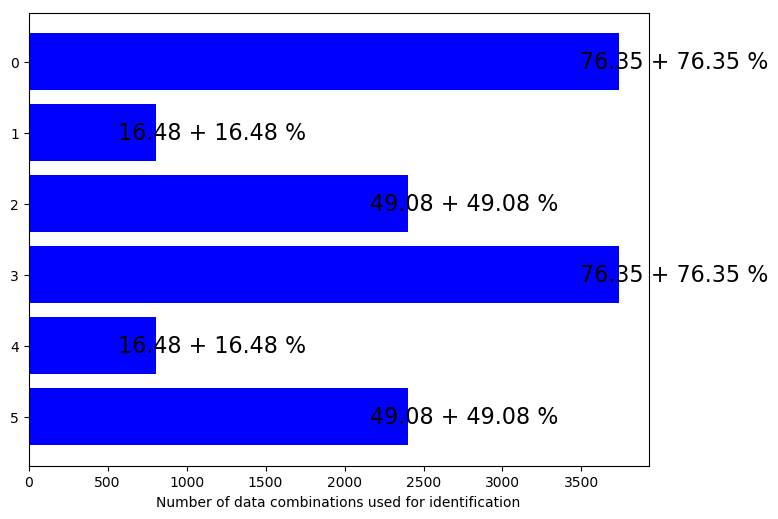

In [5]:
# plot parameter identifibaility for all fluxes using 3 data combinations
parameter_identifibaility_plot(max_parameter_3)